In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from pathlib import Path
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime

In [2]:
raw = Path('/home3/usfb/analysis/analysis-fake-news/input/reaction/1000-page/20-min/by-reaction-type/LIKE/by-page-id')
page_info_path = Path('/home3/usfb/build/output/page/1000-page-info.csv')
politifact_fake_domain_path = Path('/home3/usfb/analysis/analysis-fake-news/temp/post-match-domain/1000_page_politifact_domain.csv')
all_post_path = Path('/home3/usfb/analysis/analysis-fake-news/input/post/1000-page/2015-01-01-to-2017-04-08.csv')

In [4]:
all_post = pd.read_csv(all_post_path)
all_post

page_id                               page_name  \
0         5.444446e+10                                 WTHR-TV   
1         2.637436e+11                            9NEWS (KUSA)   
2         1.143646e+14                              ForAmerica   
3         2.178595e+10                                    9GAG   
4         3.896583e+14                         Right Wing News   
5         2.189830e+10                                BuzzFeed   
6         5.550297e+09                                     CNN   
7         5.294696e+10                                B. Scott   
8         2.178595e+10                                    9GAG   
9         2.178595e+10                                    9GAG   
10        5.930662e+10                    Good Morning America   
11        2.178595e+10                                    9GAG   
12        3.173248e+10  The Tonight Show Starring Jimmy Fallon   
13        5.550297e+09                                     CNN   
14        2.178595e+10                                    9GAG   
15        4.066771e+10                            Kirk Cameron   
16        3.469371e+14                        Occupy Democrats   
17        1.299302e+11                    Michael Baisden Live   
18        9.208540e+09                             Demi Lovato   
19        2.215686e+10    Explore Talent - Acting and Modeling   
20        9.971081e+14                               Anonymous   
21        2.178595e+10                                    9GAG   
22        1.386911e+14                          Dr. Ben Carson   
23        1.894310e+10                         Lizzy the Lezzy   
24        1.570455e+10                                Fox News   
25        2.178595e+10                                    9GAG   
26        9.124188e+09             U.S. Senator Bernie Sanders   
27        1.990986e+14                                LADbible   
28        1.894310e+10                         Lizzy the Lezzy   
29        2.178595e+10                                    9GAG   
...                ...                                     ...   
14747916  1.972120e+11                           Boston Herald   
14747917  6.619786e+10                          FOX5 Las Vegas   
14747918  3.207724e+14                          Red State Dems   
14747919  4.232416e+10                                     BET   
14747920  2.776131e+14                         Mint Press News   
14747921  9.066295e+10                      WTAE-TV Pittsburgh   
14747922  6.619786e+10                          FOX5 Las Vegas   
14747923  1.972120e+11                           Boston Herald   
14747924  1.845999e+14                     Women's Rights News   
14747925  6.619786e+10                          FOX5 Las Vegas   
14747926  1.666224e+14                           Gay Star News   
14747927  7.292472e+10                                ABC News   
14747928  7.356330e+10                      The Situation Room   
14747929  6.619786e+10                          FOX5 Las Vegas   
14747930  1.675294e+14                    Living Blue in Texas   
14747931  4.232416e+10                                     BET   
14747932  6.619786e+10                          FOX5 Las Vegas   
14747933  6.619786e+10                          FOX5 Las Vegas   
14747934  8.860326e+09                         Financial Times   
14747935  1.972120e+11                           Boston Herald   
14747936  1.972120e+11                           Boston Herald   
14747937  6.619786e+10                          FOX5 Las Vegas   
14747938  1.283341e+14                            Todd Starnes   
14747939  3.708703e+11                       Fox Carolina News   
14747940  1.972120e+11                           Boston Herald   
14747941  9.322870e+10                      Tea Party Patriots   
14747942  2.094664e+10                 The Dallas Morning News   
14747943  6.619786e+10                          FOX5 Las Vegas   
14747944  6.619786e+10                          FOX5 La

In [5]:
pageinfo = pd.read_csv(page_info_path)
politifact_with_fake_domain = pd.read_csv(politifact_fake_domain_path)
page_category = pageinfo[['page_id','category','type']]
politifact_with_fake_domain = politifact_with_fake_domain.join(page_category.set_index('page_id'), on='page_id')
politifact_with_fake_domain

page_id                       page_name  \
0       440106476051475                   Freedom Daily   
1       610045389164725                   Liberal Daily   
2       440106476051475                   Freedom Daily   
3       440106476051475                   Freedom Daily   
4       610045389164725                   Liberal Daily   
5       440106476051475                   Freedom Daily   
6       610045389164725                   Liberal Daily   
7       610045389164725                   Liberal Daily   
8       440106476051475                   Freedom Daily   
9       610045389164725                   Liberal Daily   
10      610045389164725                   Liberal Daily   
11      440106476051475                   Freedom Daily   
12      591402597574018                     Tell Me Now   
13      440106476051475                   Freedom Daily   
14      440106476051475                   Freedom Daily   
15      610045389164725                   Liberal Daily   
16      440106476051475                   Freedom Daily   
17      440106476051475                   Freedom Daily   
18      610045389164725                   Liberal Daily   
19      440106476051475                   Freedom Daily   
20      440106476051475                   Freedom Daily   
21      440106476051475                   Freedom Daily   
22         211482380627                     Disclose.tv   
23      440106476051475                   Freedom Daily   
24      228702593913193  ClashDaily.com with Doug Giles   
25      228702593913193  ClashDaily.com with Doug Giles   
26      440106476051475                   Freedom Daily   
27      440106476051475                   Freedom Daily   
28      610045389164725                   Liberal Daily   
29      228702593913193  ClashDaily.com with Doug Giles   
...                 ...                             ...   
132295  312531385450925            The Last Great Stand   
132296  312531385450925            The Last Great Stand   
132297  312531385450925            The Last Great Stand   
132298  312531385450925            The Last Great Stand   
132299  312531385450925            The Last Great Stand   
132300  312531385450925            The Last Great Stand   
132301  312531385450925            The Last Great Stand   
132302  312531385450925            The Last Great Stand   
132303  312531385450925            The Last Great Stand   
132304  146612062031906   Spokane Conservative Examiner   
132305  146612062031906   Spokane Conservative Examiner   
132306  305986132775543                  Revive America   
132307  312531385450925            The Last Great Stand   
132308  146612062031906   Spokane Conservative Examiner   
132309  312531385450925            The Last Great Stand   
132310  312531385450925            The Last Great Stand   
132311  312531385450925            The Last Great Stand   
132312  149817218374125      Girls Just Wanna Have Guns   
132313  312531385450925            The Last Great Stand   
132314  312531385450925            The Last Great Stand   
132315  425390150874429                      Sean Brown   
132316  312531385450925            The Last Great Stand   
132317  751413538254047                America is RIGHT   
132318  312531385450925            The Last Great Stand   
132319  146612062031906   Spokane Conservative Examiner   
132320  312531385450925            The Last Great Stand   
132321  425390150874429                      Sean Brown   
132322  146612062031906   Spokane Conservative Examiner   
132323  312531385450925            The Last Great Stand   
132324  312531385450925            The Last Great Stand   

                                 post_id post_type  \
0       440106476051475_1308905149171599      link   
1        610045389164725_770596729776256      link   
2       440106476051475_1138216752907107      link   
3       440106476051475_1376156649113115      link   
4        610045389164725_758948130941116      link   
5       440106476051475_127917066

## each page average likes shares comments

In [6]:
all_page_average = all_post.groupby("page_name").mean()
all_page_average['count']= all_post.groupby("page_name").size()

In [7]:
all_page_average = all_page_average[['post_likes','post_comments','post_shares','count']]
all_page_average.reset_index(inplace=True)
all_page_average.to_excel(writer,'All_Page_Average')

In [8]:
fake_page_list = list(politifact_with_fake_domain.page_name.unique())

In [9]:
fake_page_detail = all_post[all_post.page_name.isin(fake_page_list)]
true_page_detail = all_post[~all_post.page_name.isin(fake_page_list)]

In [10]:
column = ['avg_like','avg_share','avg_comment']
fake_true_comparison = pd.DataFrame(columns=column)
fake_page_info = [{"avg_like":fake_page_detail.post_likes.mean(),
                  "avg_share":fake_page_detail.post_shares.mean(),
                  "avg_comment":fake_page_detail.post_comments.mean()}]
true_page_info = [{"avg_like":true_page_detail.post_likes.mean(),
                 "avg_share":true_page_detail.post_shares.mean(),
                 "avg_comment":true_page_detail.post_comments.mean()}]
fake_true_comparison = fake_true_comparison.append(fake_page_info)
fake_true_comparison = fake_true_comparison.append(true_page_info)
fake_true_comparison.index = ['Fake_Page','True_Page']
fake_true_comparison.to_excel(writer,'fake_true_page_comparison')

In [11]:
politician = Path('/home3/usfb/analysis/analysis-fake-news/temp/post-match-domain/politician.csv')
politicians = pd.read_csv(politician)
politician_list = list(politicians.page_name.unique())
politicians


page_id                                          page_name  \
0          69983322463                                           Ted Cruz   
1          69983322463                                           Ted Cruz   
2          69983322463                                           Ted Cruz   
3          69983322463                                           Ted Cruz   
4          50375006903                                      Louie Gohmert   
5         181888625087                                        Greg Abbott   
6          69983322463                                           Ted Cruz   
7          69983322463                                           Ted Cruz   
8         181888625087                                        Greg Abbott   
9         181888625087                                        Greg Abbott   
10         69983322463                                           Ted Cruz   
11        181888625087                                        Greg Abbott   
12         69983322463                                           Ted Cruz   
13        181888625087                                        Greg Abbott   
14         69983322463                                           Ted Cruz   
15        173347701125                                Governor Jan Brewer   
16         69983322463                                           Ted Cruz   
17        181888625087                                        Greg Abbott   
18        181888625087                                        Greg Abbott   
19         69983322463                                           Ted Cruz   
20         69983322463                                           Ted Cruz   
21        173347701125                                Governor Jan Brewer   
22         69983322463                                           Ted Cruz   
23         54172246106                                          Rand Paul   
24        181888625087                                        Greg Abbott   
25         69983322463                                           Ted Cruz   
26         54172246106                                          Rand Paul   
27         54172246106                                          Rand Paul   
28        173347701125                                Governor Jan Brewer   
29        181888625087                                        Greg Abbott   
...                ...                                                ...   
1829   995742947182709                                 Richard Longstreth   
1830  1432000123682039  Al Hardwick for Congress in Michigan's 5th Dis...   
1831   736011366418469                             Ed Rankin for Congress   
1832      250961715499                     Paul Chabot for Strong America   
1833   735648623225176                             Dan Hogan for Congress   
1834   522549864510526                          Andy Whallon for Congress   
1835   245385145524887                                       John Fleming   
1836   245385145524887                                       John Fleming   
1837   736011366418469                             Ed Rankin for Congress   
1838   811062018922374    Roy Welborn for US Congress Missouri District 5   
1839   811062018922374    Roy Welborn for US Congress Missouri District 5   
1840   811062018922374    Roy Welborn for US Congress Missouri District 5   
1841  1263725620325913    Bill Abatecola, R Candidate for US Congress CD3   
1842   237760959647650                                   Robert Pittenger   
1843   587534794675887                            Mike Kolls for Congress   
1844   626152827458075                              Cat Ping For Congress   
1845   736011366418469                             Ed Rankin for Congress   
1846   811062018922374    Roy Welborn for US Congress Missouri District 5   
1847   811062018922374    Roy Welborn for US Congress Missouri District 5   
1848  1559348721058778                   Steve Isaacson for Congress 2018   
1849   7360

In [12]:
politician_post_from_all = all_post[all_post.page_name.isin(politician_list)]
politician_post_from_all

page_id            page_name                         post_id  \
3502      5.417225e+10            Rand Paul   54172246106_10153964938326107   
3628      1.733477e+11  Governor Jan Brewer  173347701125_10152550765231126   
6248      6.998332e+10             Ted Cruz   69983322463_10154618977607464   
7400      6.998332e+10             Ted Cruz   69983322463_10154486612677464   
12571     5.417225e+10            Rand Paul   54172246106_10152790068896107   
13436     6.998332e+10             Ted Cruz   69983322463_10154476728267464   
14123     6.998332e+10             Ted Cruz   69983322463_10153049124657464   
14165     6.998332e+10             Ted Cruz   69983322463_10153184451317464   
15359     6.998332e+10             Ted Cruz   69983322463_10153710087627464   
15604     5.417225e+10            Rand Paul   54172246106_10154306179871107   
16123     1.733477e+11  Governor Jan Brewer  173347701125_10153543021231126   
16324     6.998332e+10             Ted Cruz   69983322463_10153725637517464   
16514     6.998332e+10             Ted Cruz   69983322463_10153633017117464   
16999     1.733477e+11  Governor Jan Brewer  173347701125_10152778930981126   
18957     6.998332e+10             Ted Cruz   69983322463_10153928288217464   
20284     1.733477e+11  Governor Jan Brewer  173347701125_10152491917216126   
20680     5.417225e+10            Rand Paul   54172246106_10153161560311107   
20836     6.998332e+10             Ted Cruz   69983322463_10153945965862464   
20883     5.417225e+10            Rand Paul   54172246106_10153544918351107   
21424     6.998332e+10             Ted Cruz   69983322463_10154254165982464   
21519     6.998332e+10             Ted Cruz   69983322463_10153724760487464   
21527     6.998332e+10             Ted Cruz   69983322463_10153777717527464   
22582     6.998332e+10             Ted Cruz   69983322463_10153638995517464   
22789     6.998332e+10             Ted Cruz   69983322463_10153937295612464   
23954     6.998332e+10             Ted Cruz   69983322463_10153862221417464   
24970     6.998332e+10             Ted Cruz   69983322463_10153932390137464   
25239     5.417225e+10            Rand Paul   54172246106_10153137246471107   
25538     6.998332e+10             Ted Cruz   69983322463_10153596434802464   
25667     6.998332e+10             Ted Cruz   69983322463_10153928392802464   
25677     5.417225e+10            Rand Paul   54172246106_10153514013306107   
...                ...                  ...                             ...   
11273060  6.998332e+10             Ted Cruz   69983322463_10153816586742464   
11278651  5.417225e+10            Rand Paul   54172246106_10153293280766107   
11283707  5.417225e+10            Rand Paul   54172246106_10153194916236107   
11292642  5.417225e+10            Rand Paul   54172246106_10153231850381107   
11295667  5.417225e+10            Rand Paul   54172246106_10153349413256107   
11297760  1.733477e+11  Governor Jan Brewer  173347701125_10153741930366126   
11299660  5.417225e+10            Rand Paul   54172246106_10153375997451107   
11308393  5.417225e+10            Rand Paul   54172246106_10153320988396107   
11330002  5.417225e+10            Rand Paul   54172246106_10153231794696107   
11372980  5.417225e+10            Rand Paul   54172246106_10153375840766107   
11412640  5.417225e+10            Rand Paul   54172246106_10153376201331107   
11418171  5.417225e+10            Rand Paul   54172246106_10153248136526107   
11493815  5.417225e+10            Rand Paul   54172246106_10153376210321107   
11521134  5.417225e+10            Rand Paul   54172246106_10153375897551107   
11532907  5.417225e+10            Rand Paul   54172246106_10153376040581107   
11578491  5.417225e+10            Rand Paul   54172246106_10153376017966107   
11586690  5.417225e+10            Rand Paul   54172246106_10153375870266107   
11631338  5.417225e+10            Rand Paul   54172246106_10153375870421107   
11661297  5.417225e+10            Rand Paul   54172246106_1015323

# Fake News Analysis

## seperate by category

In [13]:
pageinfo_separate_by_cat = pageinfo.groupby('category').mean()
pageinfo_separate_by_cat = pageinfo_separate_by_cat[['total_like','total_comment','total_share','fan_count']]
pageinfo_separate_by_cat['page_num'] = pageinfo.groupby('category').size()

In [14]:
politifact_separate_by_cat = politifact_with_fake_domain.groupby('category').mean()
politifact_separate_by_cat = politifact_separate_by_cat[['post_reactions','post_likes','post_comments','post_shares','page_talking_about_count']]
politifact_separate_by_cat['count'] = politifact_with_fake_domain.groupby('category').size()
politifact_separate_by_cat['page_num'] = politifact_with_fake_domain.groupby(['category','page_name']).size().reset_index().groupby('category').size()
politifact_separate_by_cat = politifact_separate_by_cat[politifact_separate_by_cat['count']>90]
politifact_separate_by_cat.sort_values('count')

post_reactions   post_likes  \
category                                                           
Organization                             742.393939   287.479167   
Arts/Humanities Website                  829.888889   700.762887   
Education                                195.031250   110.432584   
Political Organization                   499.842975   381.148571   
Musician/Band                           2144.972028  1556.852273   
Website                                 1073.092784   786.185819   
Society/Culture Website                  915.402985   815.295880   
Personal Blog                            333.233108   275.406932   
Non-Governmental Organization (NGO)      235.392357   168.049682   
Journalist                                24.344520    32.268938   
Just For Fun                             101.338462    73.511339   
Public Figure                           1403.603015  1035.955148   
Publisher                                225.992290   155.677253   
Cause                                     67.893318    59.693882   
Politician                                95.750403    42.280969   
Community                                923.746053   751.328808   
Media/News/Publishing                   2268.661361  1759.074841   
News/Media Website                       738.892600   369.993087   

                                     post_comments  post_shares  \
category                                                          
Organization                             71.552083   338.600000   
Arts/Humanities Website                  76.103093   304.968750   
Education                                15.797753   134.902098   
Political Organization                  104.131429   429.902685   
Musician/Band                           296.059659  2155.670455   
Website                                  87.520782   356.331633   
Society/Culture Website                 129.157303   441.550562   
Personal Blog                            64.798460   168.778271   
Non-Governmental Organization (NGO)      42.351592    98.579421   
Journalist                                6.018342    20.920854   
Just For Fun                             18.390850    40.362968   
Public Figure                           182.337173   439.880175   
Publisher                                40.911921    76.551963   
Cause                                    16.752877    32.982930   
Politician                                8.456996    50.007389   
Community                               191.561406   547.583880   
Media/News/Publishing                   265.371396   871.017663   
News/Media Website                      101.120265   327.992299   

                                     page_talking_about_count  count  page_num  
category                                                                        
Organization                                     4.965308e+04     96         2  
Arts/Humanities Website                          4.512231e+05     97         1  
Education                                        5.513023e+04    178         3  
Political Organization                           1.595614e+05    350        14  
Musician/Band                                    1.256542e+07    352         2  
Website                                          3.996985e+05    409         4  
Society/Culture Website                          1.107704e+05    534         2  
Personal Blog                                    5.524922e+04    779         2  
Non-Governmental Organization (NGO)              3.385693e+04   1570         1  
Journalist                                       3.241681e+04   4198         3  
Just For Fun                                     2.543958e+04   5071         1  
Public Figure                                    3.775713e+05   5730        17  
Publisher                                        2.465086e+04   6392         1  
Cause                                            1.755764e+04   8255         3  
Politician                             

## seperate by type

In [15]:
pageinfo_separate_by_type = pageinfo.groupby('type').mean()
pageinfo_separate_by_type = pageinfo_separate_by_type[['total_like','total_comment','total_share','fan_count']]
pageinfo_separate_by_type['page_num'] = pageinfo.groupby('type').size()

In [16]:
politifact_separate_by_type = politifact_with_fake_domain.groupby('type').mean()
politifact_separate_by_type = politifact_separate_by_type[['post_reactions','post_likes','post_comments','post_shares','page_talking_about_count']]
politifact_separate_by_type['count'] = politifact_with_fake_domain.groupby('type').size()
politifact_separate_by_type['page_num'] = politifact_with_fake_domain.groupby(['type','page_name']).size().reset_index().groupby('type').size()
politifact_separate_by_type

post_reactions  post_likes  post_comments  post_shares  \
type                                                             
figure      482.353943  336.531283      78.051039   194.284932   
group       581.435492  444.999275     100.825327   279.041251   
media      1227.113731  641.382905     125.076634   420.594803   
others     1559.808824  883.352396     165.001546  1236.947702   

        page_talking_about_count  count  page_num  
type                                               
figure              1.461013e+05  16223        24  
group               1.170871e+05  31745        92  
media               3.221109e+05  83710        56  
others              6.871414e+06    647         5

## fake domain analysis

In [17]:
politifact_separate_by_domain = politifact_with_fake_domain.groupby('domain').mean()
politifact_separate_by_domain.sort_values('post_likes')
domain_list = politifact_separate_by_domain.index.tolist()
domain_list

['247NewsMedia.com',
 'ANews24.org',
 'AmericanPoliticNews.co',
 'AngryPatriotMovement.com',
 'BB4SP.com',
 'BeforeItsNews.com',
 'BuzzFeedUSA.com',
 'CivicTribune.com',
 'ClashDaily.com',
 'ConservativeDailyPost.com',
 'ConservativeSpirit.com',
 'DailyNewsPosts.info',
 'DailySurge.com',
 'DemocraticMoms.com',
 'Disclose.tv',
 'DonaldTrumpPOTUS45.com',
 'En-Volve.com',
 'FederalistTribune.com',
 'FedsAlert.com',
 'FreedomDaily.com',
 'FreedomsFinalStand.com',
 'GiveMeLiberty01.com',
 'GummyPost.com',
 'HealthyWorldHouse.com',
 'LastDeplorables.com',
 'LiberalPlug.com',
 'Liberty-Courier.com',
 'LibertyAlliance.com',
 'MadWorldNews.com',
 'NeonNettle.com',
 'NewPoliticsToday.com',
 'NewsBreaksHere.com',
 'NewsExaminer.net',
 'NewzMagazine.com',
 'NotAllowedTo.com',
 'OnePoliticalPlaza.com',
 'PoliticsUSANews.com',
 'President45DonaldTrump.com',
 'Prntly.com',
 'ReadConservatives.news',
 'RedCountry.us',
 'ReligionMind.com',
 'Spinzon.com',
 'SupremePatriot.com',
 'TDTAlliance.com',
 'TM

In [18]:
domain_page_relation = politifact_with_fake_domain.groupby(['domain','page_name']).size()
domain_page_relation = domain_page_relation.reset_index()
domain_page_relation

domain  \
0             247NewsMedia.com   
1                  ANews24.org   
2                  ANews24.org   
3                  ANews24.org   
4                  ANews24.org   
5                  ANews24.org   
6                  ANews24.org   
7       AmericanPoliticNews.co   
8       AmericanPoliticNews.co   
9       AmericanPoliticNews.co   
10      AmericanPoliticNews.co   
11      AmericanPoliticNews.co   
12    AngryPatriotMovement.com   
13    AngryPatriotMovement.com   
14    AngryPatriotMovement.com   
15    AngryPatriotMovement.com   
16    AngryPatriotMovement.com   
17    AngryPatriotMovement.com   
18    AngryPatriotMovement.com   
19    AngryPatriotMovement.com   
20    AngryPatriotMovement.com   
21    AngryPatriotMovement.com   
22    AngryPatriotMovement.com   
23    AngryPatriotMovement.com   
24    AngryPatriotMovement.com   
25    AngryPatriotMovement.com   
26    AngryPatriotMovement.com   
27    AngryPatriotMovement.com   
28    AngryPatriotMovement.com   
29    AngryPatriotMovement.com   
..                         ...   
715               USHerald.com   
716               USHerald.com   
717               USHerald.com   
718               USHerald.com   
719             USInfoNews.com   
720             USInfoNews.com   
721                 USPOLN.com   
722                 USPOLN.com   
723                 USPOLN.com   
724                 USPOLN.com   
725              USPostman.com   
726  UndergroundNewsReport.com   
727  UndergroundNewsReport.com   
728  UndergroundNewsReport.com   
729       UniversePolitics.com   
730       UniversePolitics.com   
731       UniversePolitics.com   
732       UniversePolitics.com   
733       UniversePolitics.com   
734       UniversePolitics.com   
735       UniversePolitics.com   
736       UniversePolitics.com   
737       UniversePolitics.com   
738       UniversePolitics.com   
739             VoxTribune.com   
740             VoxTribune.com   
741         WashingtonFeed.com   
742         WashingtonFeed.com   
743         WashingtonFeed.com   
744         WashingtonFeed.com   

                                             page_name     0  
0                    America Elects a Leader president     1  
1                     American's Who Stand For America    83  
2                          Anonymous The World is Ours     1  
3                 Democrats Driving Forward to Victory    42  
4                 Donald Trump, The Political Movement     1  
5                         Prepare to Take America Back     1  
6                                      Reclaim America     1  
7                                  Ann Romney Fan Site     1  
8         Conservatives Against Obama's Liberal Agenda     1  
9                                 One Nation Under God     2  
10                                         Rick Joyner     1  
11                                The Last Great Stand     1  
12                  America Needs a Truthful president     2  
13                    American's Who Stand For America    64  
14                     Americans Who Stand For America     2  
15                             Angry American Patriots     2  
16                                 Ann Romney Fan Site    30  
17                         Anonymous The World is Ours     1  
18                                     Being Libtarded     1  
19                                          CJ Pearson     1  
20                               Craig "Sawman" Sawyer     2  
21                Donald Trump, The Political Movement    33  
22                              Last American Patriots     6  
23                               Law Enforcement Today     1  
24                                One Nation Under God     6  
25                     Political Correctness Gone Wild     9  
26                                     Reclaim America   103  
27                                 Red White Blue News     1  
28                                 THE GREAT AWAKENING     3  
29                       

In [19]:
fake_domain = politifact_with_fake_domain.groupby('domain').mean()
fake_domain = fake_domain[['post_likes','post_comments','post_shares']]
fake_domain['count'] = politifact_with_fake_domain.groupby('domain').size()
fake_domain.sort_values('count')

post_likes  post_comments  post_shares  count
domain                                                                    
247NewsMedia.com             178.000000      18.000000    62.000000      1
GiveMeLiberty01.com            8.000000       6.000000     6.000000      1
FederalistTribune.com        719.000000     132.000000   295.000000      1
PoliticsUSANews.com         1158.000000     697.000000   359.000000      1
RedCountry.us                595.000000     643.000000   838.000000      1
ReligionMind.com             446.000000     207.000000   615.000000      1
USASnich.com                 261.000000      60.000000   148.000000      1
ConservativeSpirit.com        57.000000       5.000000    46.000000      1
LastDeplorables.com          341.000000     186.000000   132.000000      1
NewzMagazine.com             233.000000      48.000000   671.000000      2
OnePoliticalPlaza.com          7.000000       2.000000     7.000000      2
DemocraticMoms.com           122.500000      38.500000   222.000000      2
TheTrumpMedia.com             66.500000      11.000000    41.500000      2
USAPolitics24hrs.com        1757.000000     133.000000  1750.500000      2
BuzzFeedUSA.com              208.000000     644.000000   307.000000      2
USInfoNews.com               147.500000       8.000000   191.000000      2
USPostman.com               3196.000000     411.500000  1251.500000      2
NewPoliticsToday.com         718.000000     560.000000  5113.500000      2
CivicTribune.com             167.666667      76.666667   430.500000      3
USHealthyAdvisor.com        1774.666667     608.666667  1365.000000      3
NotAllowedTo.com             120.333333     100.000000   542.666667      3
UndergroundNewsReport.com    302.000000      41.333333   246.333333      3
GummyPost.com               1545.333333     598.000000  2469.000000      3
VoxTribune.com                33.333333      15.333333    80.000000      3
USPOLN.com                  1776.000000     249.500000  1348.500000      4
USADailyTime.com             359.000000      32.500000   229.000000      4
NewsExaminer.net             125.500000      37.000000   177.000000      4
TDTAlliance.com              267.800000     134.800000   504.400000      5
AmericanPoliticNews.co      1693.333333     731.833333  1855.000000      6
ReadConservatives.news       140.666667      14.666667   109.666667      6
...                                 ...            ...          ...    ...
FreedomsFinalStand.com       260.615385     133.923077   503.777778     13
En-Volve.com                 708.882353     197.352941   426.083333     17
DailyNewsPosts.info          748.900000     209.700000   930.000000     20
TrueAmericans.me             398.047619      77.857143   116.833333     21
FedsAlert.com               5666.666667     207.708333   733.600000     24
NewsBreaksHere.com           384.068966     123.103448    66.250000     29
Spinzon.com                  609.388889     283.416667  1418.033333     36
USAPoliticsNow.com           440.095238      42.571429   207.200000     42
President45DonaldTrump.com    59.500000       9.217391    13.666667     46
DonaldTrumpPOTUS45.com         6.405063       1.316456     3.490196     79
NeonNettle.com               262.290323      38.129032   205.272727     93
SupremePatriot.com           836.155172     186.017241   510.087379    116
Liberty-Courier.com           41.109375      16.789062    51.500000    128
ANews24.org                  410.620155      95.147287    51.311111    129
DailySurge.com               132.217687      27.517007    86.734375    147
ConservativeDailyPost.com    290.761905      85.125000   394.475862    168
AngryPatriotMovement.com     182.476364      23.949091   154.850806    275
Prntly.com                   277.353349      51.113164   168.963145    433
TMZWorldNews.com            3307.397089     212.721414  1658.739606    481
USAPoliticsToday.com         910.662028     182.964215   521.643799    503
LiberalPlug.com             3707.660598     388.976593

In [20]:
fake_domain_seldom = fake_domain[fake_domain['count']<10]
fake_domain_pro = fake_domain[fake_domain['count']>3000]

## Add Politician FanPage for Comparison

In [21]:
politician = Path('/home3/usfb/analysis/analysis-fake-news/temp/post-match-domain/politician.csv')
politicians = pd.read_csv(politician)

In [22]:
politics = politicians.groupby('page_name').mean()
politics['count'] = politicians.groupby('page_name').size()
politics= politics[['post_likes','post_comments','post_shares']]
politics

post_likes  \
page_name                                                          
Al Hardwick for Congress in Michigan's 5th Dist...      3.000000   
Andy Biggs                                             27.000000   
Andy Harris                                           181.000000   
Andy Whallon for Congress                               2.500000   
Ann Wagner                                              1.000000   
Art Halvorson for Congress                             39.000000   
Ben Sasse                                             474.500000   
Bill Abatecola, R Candidate for US Congress CD3         0.000000   
Bill Cassidy                                          247.750000   
Bill Flores                                           146.333333   
Bill Ritter                                            68.000000   
Billy Burkette for Congress                             2.000000   
Blaine Luetkemeyer                                     25.500000   
Bobby Jindal                                          379.000000   
Brett Geymann for Louisiana                            53.000000   
Brian Mast                                            254.000000   
Buddy Carter                                           13.000000   
Candice Miller                                         20.000000   
Cat Ping For Congress                                   4.909091   
Charles Lingerfelt For U. S. Congress -                 2.000000   
Chris Christie                                        792.428571   
Chris Vance                                             2.000000   
Chuck Grassley                                          4.000000   
Claudia Tenney for Congress                           221.000000   
Congressman Blake Farenthold                           51.727273   
Congressman Chris Stewart                              76.000000   
Congressman Daniel Webster                            256.000000   
Congressman Darrell E. Issa                           821.000000   
Congressman Dave Brat                                  14.250000   
Congressman Doug Lamborn                               45.142857   
...                                                          ...   
Senator Rand Paul                                    1723.500000   
Senator Richard Burr                                  193.500000   
Senator Richard Shelby                                251.000000   
Senator Rob Portman                                   136.000000   
Senator Ted Cruz                                    10131.000000   
Senator Thom Tillis                                   159.000000   
Senator Todd Young                                     13.000000   
Sheriff Paul Babeu                                    114.818182   
Steve Isaacson for Congress 2018                        0.000000   
Steve King                                            441.166667   
Steve King for Congress                               167.666667   
Steven Palazzo                                        253.000000   
Sue Googe                                              10.000000   
Ted Cruz                                            19128.833333   
Ted Cruz Is The Man                                   566.100775   
Ted Poe                                               136.333333   
Ted Yoho                                              370.600000   
Tim Huelskamp for Congress                            436.000000   
Todd Young                                             67.500000   
Tom Cotton                                           1910.857143   
Tom Marino                                             77.333333   
Trent Franks                                           13.000000   
Trey Gowdy News and Support                           196.183099   
Troy Arthur Bonar                                      11.000000   
Tulsi Gabbard                                         469.000000   
U.S. Representative Bradley Byrne                     265.600000   
U.S. Representative John Fleming          

In [23]:
politifact_pro = politifact_with_fake_domain[(politifact_with_fake_domain['domain']=='BB4SP.com')|(politifact_with_fake_domain['domain']=='BeforeItsNews.com')|(politifact_with_fake_domain['domain']=='ClashDaily.com')|(politifact_with_fake_domain['domain']=='Disclose.tv')|(politifact_with_fake_domain['domain']=='FreedomDaily.com')|(politifact_with_fake_domain['domain']=='MadWorldNews.com')|(politifact_with_fake_domain['domain']=='USHerald.com')]

In [24]:
print(fake_domain_seldom['post_likes'].mean())
print(fake_domain_pro['post_likes'].mean())
print(politics['post_likes'].mean())

633.68177008177
861.6391205510283
575.8238362773211


In [25]:
print(fake_domain_seldom['post_comments'].mean())
print(fake_domain_pro['post_comments'].mean())
print(politics['post_comments'].mean())

208.47037037037035
146.91158764378912
59.93571542613603


In [26]:
print(fake_domain_seldom['post_shares'].mean())
print(fake_domain_pro['post_shares'].mean())
print(politics['post_shares'].mean())

672.880808080808
481.0568098908866
135.8483961008781


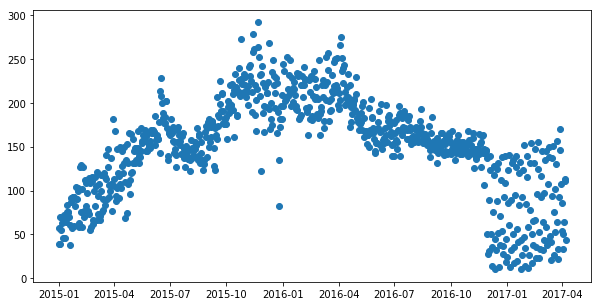

In [27]:
times = pd.DataFrame()
times = politifact_pro.groupby('post_created_date_CT').mean()
times['count'] = politifact_pro.groupby('post_created_date_CT').size()
times.reset_index(level=0, inplace=True)
times=times[['post_created_date_CT','count']]
times['post_created_date_CT'] = times['post_created_date_CT'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))
plt.rcParams['figure.figsize'] = [10, 5]
mpl.pyplot.plot_date(times['post_created_date_CT'], times['count'])

In [28]:
politifact_seldom = politifact_with_fake_domain[(politifact_with_fake_domain['domain']=='247NewsMedia.com')|(politifact_with_fake_domain['domain']=='AmericanPoliticNews.co	')|(politifact_with_fake_domain['domain']=='BuzzFeedUSA.com	')|(politifact_with_fake_domain['domain']=='CivicTribune.com')|(politifact_with_fake_domain['domain']=='ConservativeSpirit.com')|(politifact_with_fake_domain['domain']=='DemocraticMoms.com')|(politifact_with_fake_domain['domain']=='FederalistTribune.com')|(politifact_with_fake_domain['domain']=='GiverLiberty01.com')|(politifact_with_fake_domain['domain']=='GummyPost.com')|(politifact_with_fake_domain['domain']=='LastDeplorables.com')|(politifact_with_fake_domain['domain']=='NewPoliticsToday.com')|(politifact_with_fake_domain['domain']=='NewsExaminer.net')|(politifact_with_fake_domain['domain']=='NewsMagazine.com')|(politifact_with_fake_domain['domain']=='NoteAllowedTo.com')|(politifact_with_fake_domain['domain']=='OnePoliticalPlaza.com')|(politifact_with_fake_domain['domain']=='PoliticsUSANews.com')|
                                                (politifact_with_fake_domain['domain']=='ReadConservatives.news')|(politifact_with_fake_domain['domain']=='RedCountry.us')|(politifact_with_fake_domain['domain']=='ReligionMind.com')|(politifact_with_fake_domain['domain']=='TDTAlliance.com	')|(politifact_with_fake_domain['domain']=='The-Insider.co')|(politifact_with_fake_domain['domain']=='TheTrumpMedia.com')|(politifact_with_fake_domain['domain']=='USADailyInfo.com')|(politifact_with_fake_domain['domain']=='USADailyTime.com')|
                                                (politifact_with_fake_domain['domain']=='USANewsHome.com')|(politifact_with_fake_domain['domain']=='USAPolitics24hrs.com')|(politifact_with_fake_domain['domain']=='USASnich.com')|(politifact_with_fake_domain['domain']=='USHealthyAdvisor.com')|
                                                (politifact_with_fake_domain['domain']=='USInfoNews.com')|(politifact_with_fake_domain['domain']=='USPOLN.com')|(politifact_with_fake_domain['domain']=='USPostman.com')|(politifact_with_fake_domain['domain']=='UndergroundNewsReport.com')|(politifact_with_fake_domain['domain']=='VoxTribune.com')]

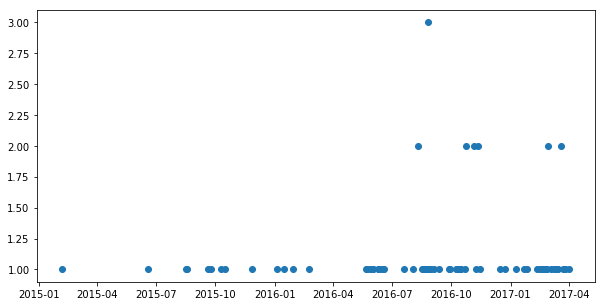

In [29]:
times = pd.DataFrame()
times = politifact_seldom.groupby('post_created_date_CT').mean()
times['count'] = politifact_seldom.groupby('post_created_date_CT').size()
times.reset_index(level=0, inplace=True)
times=times[['post_created_date_CT','count']]
times['post_created_date_CT'] = times['post_created_date_CT'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))
plt.rcParams['figure.figsize'] = [10, 5]
mpl.pyplot.plot_date(times['post_created_date_CT'], times['count'])

In [30]:
post_sort_by_created_time = politifact_with_fake_domain.sort_values(['page_name','post_created_date_CT'])

## domain page relation

In [31]:
page_domain = politifact_with_fake_domain.groupby(['page_name','domain']).size()
page_domain = page_domain.reset_index()
page_domain

page_name                     domain  \
0    1 Million Strong For Hillary Clinton in 2016                 Prntly.com   
1    1 Million Strong For Hillary Clinton in 2016                Spinzon.com   
2                              100 Percent FED Up             ClashDaily.com   
3                              100 Percent FED Up           FreedomDaily.com   
4                              100 Percent FED Up               USHerald.com   
5                                 Abolish The IRS             DailySurge.com   
6                                 Abolish The IRS               USHerald.com   
7                                  Adryenn Ashley        LibertyAlliance.com   
8                  African-American Conservatives             DailySurge.com   
9                  African-American Conservatives               USHerald.com   
10                            Allen West Republic                  BB4SP.com   
11                            Allen West Republic          BeforeItsNews.com   
12                            Allen West Republic             ClashDaily.com   
13                            Allen West Republic        LibertyAlliance.com   
14                            Allen West Republic               USHerald.com   
15              America Elects a Leader president           247NewsMedia.com   
16              America Elects a Leader president                  BB4SP.com   
17              America Elects a Leader president          BeforeItsNews.com   
18              America Elects a Leader president             ClashDaily.com   
19              America Elects a Leader president  ConservativeDailyPost.com   
20              America Elects a Leader president             DailySurge.com   
21              America Elects a Leader president           FreedomDaily.com   
22              America Elects a Leader president           MadWorldNews.com   
23              America Elects a Leader president         NewsBreaksHere.com   
24              America Elects a Leader president          TheTrumpMedia.com   
25              America Elects a Leader president       USAPoliticsToday.com   
26              America Elects a Leader president               USHerald.com   
27              America Elects a Leader president  UndergroundNewsReport.com   
28              America Elects a Leader president             VoxTribune.com   
29             America Needs a Truthful president   AngryPatriotMovement.com   
..                                            ...                        ...   
715                             The Witty Liberal             DailySurge.com   
716                             The Witty Liberal               En-Volve.com   
717                             The Witty Liberal         USAPoliticsNow.com   
718                             The Witty Liberal       UniversePolitics.com   
719                       The voice of the people          BeforeItsNews.com   
720                       The voice of the people             ClashDaily.com   
721                       The voice of the people                Disclose.tv   
722                       The voice of the people           MadWorldNews.com   
723                                         Trina              FedsAlert.com   
724                                         Trina           TMZWorldNews.com   
725                                  Wake Up News             NeonNettle.com   
726                                  Wake Up News       USAPoliticsToday.com   
727                              Wayne Allyn Root   AngryPatriotMovement.com   
728                              Wayne Allyn Root             ClashDaily.com   
729                              Wayne Allyn Root  ConservativeDailyPost.com   
730                              Wayne Allyn Root             DailySurge.com   
731                              Wayne Allyn Root           FreedomDaily.com   
732                              Wayne Allyn Root           MadWorldNews.com   
733                              Wayne A

### pages with the same name as domain

In [32]:
similar_or_the_same_name= ['Barracuda Brigade',
                           'ClashDaily.com with Doug Giles',
                           'Mad World News',
                           'Breitbart - One Voice Silenced, Millions Awakened',
                           'Disclose.tv',
                           'Freedom Daily',
                           'Liberal Daily']

In [33]:
first_post_create_time = pd.DataFrame()
for i in similar_or_the_same_name:
    first_created = post_sort_by_created_time[post_sort_by_created_time['page_name']==i].head(1)
    first_post_create_time = pd.concat([first_post_create_time,first_created])
first_post_create_time = first_post_create_time[['page_name','post_created_date_CT']]
first_post_create_time['post_created_date_CT'] = first_post_create_time['post_created_date_CT'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))
first_post_create_time

page_name post_created_date_CT
97321                                  Barracuda Brigade           2015-03-15
64262                     ClashDaily.com with Doug Giles           2014-12-31
28108                                     Mad World News           2014-12-31
48013  Breitbart - One Voice Silenced, Millions Awakened           2015-05-03
22874                                        Disclose.tv           2015-01-01
8856                                       Freedom Daily           2016-03-14
6954                                       Liberal Daily           2017-01-02

In [34]:
page_domain_same = politifact_with_fake_domain[(politifact_with_fake_domain['page_name'] == 'Barracuda Brigade') | (politifact_with_fake_domain['page_name'] == 'ClashDaily.com with Doug Giles') |
                         (politifact_with_fake_domain['page_name'] == 'Mad World News') |(politifact_with_fake_domain['page_name'] == 'Breitbart - One Voice Silenced, Millions Awakened') |
                         (politifact_with_fake_domain['page_name'] == 'Disclose.tv') |(politifact_with_fake_domain['page_name'] == 'Freedom Daily') |(politifact_with_fake_domain['page_name'] == 'Liberal Daily')]

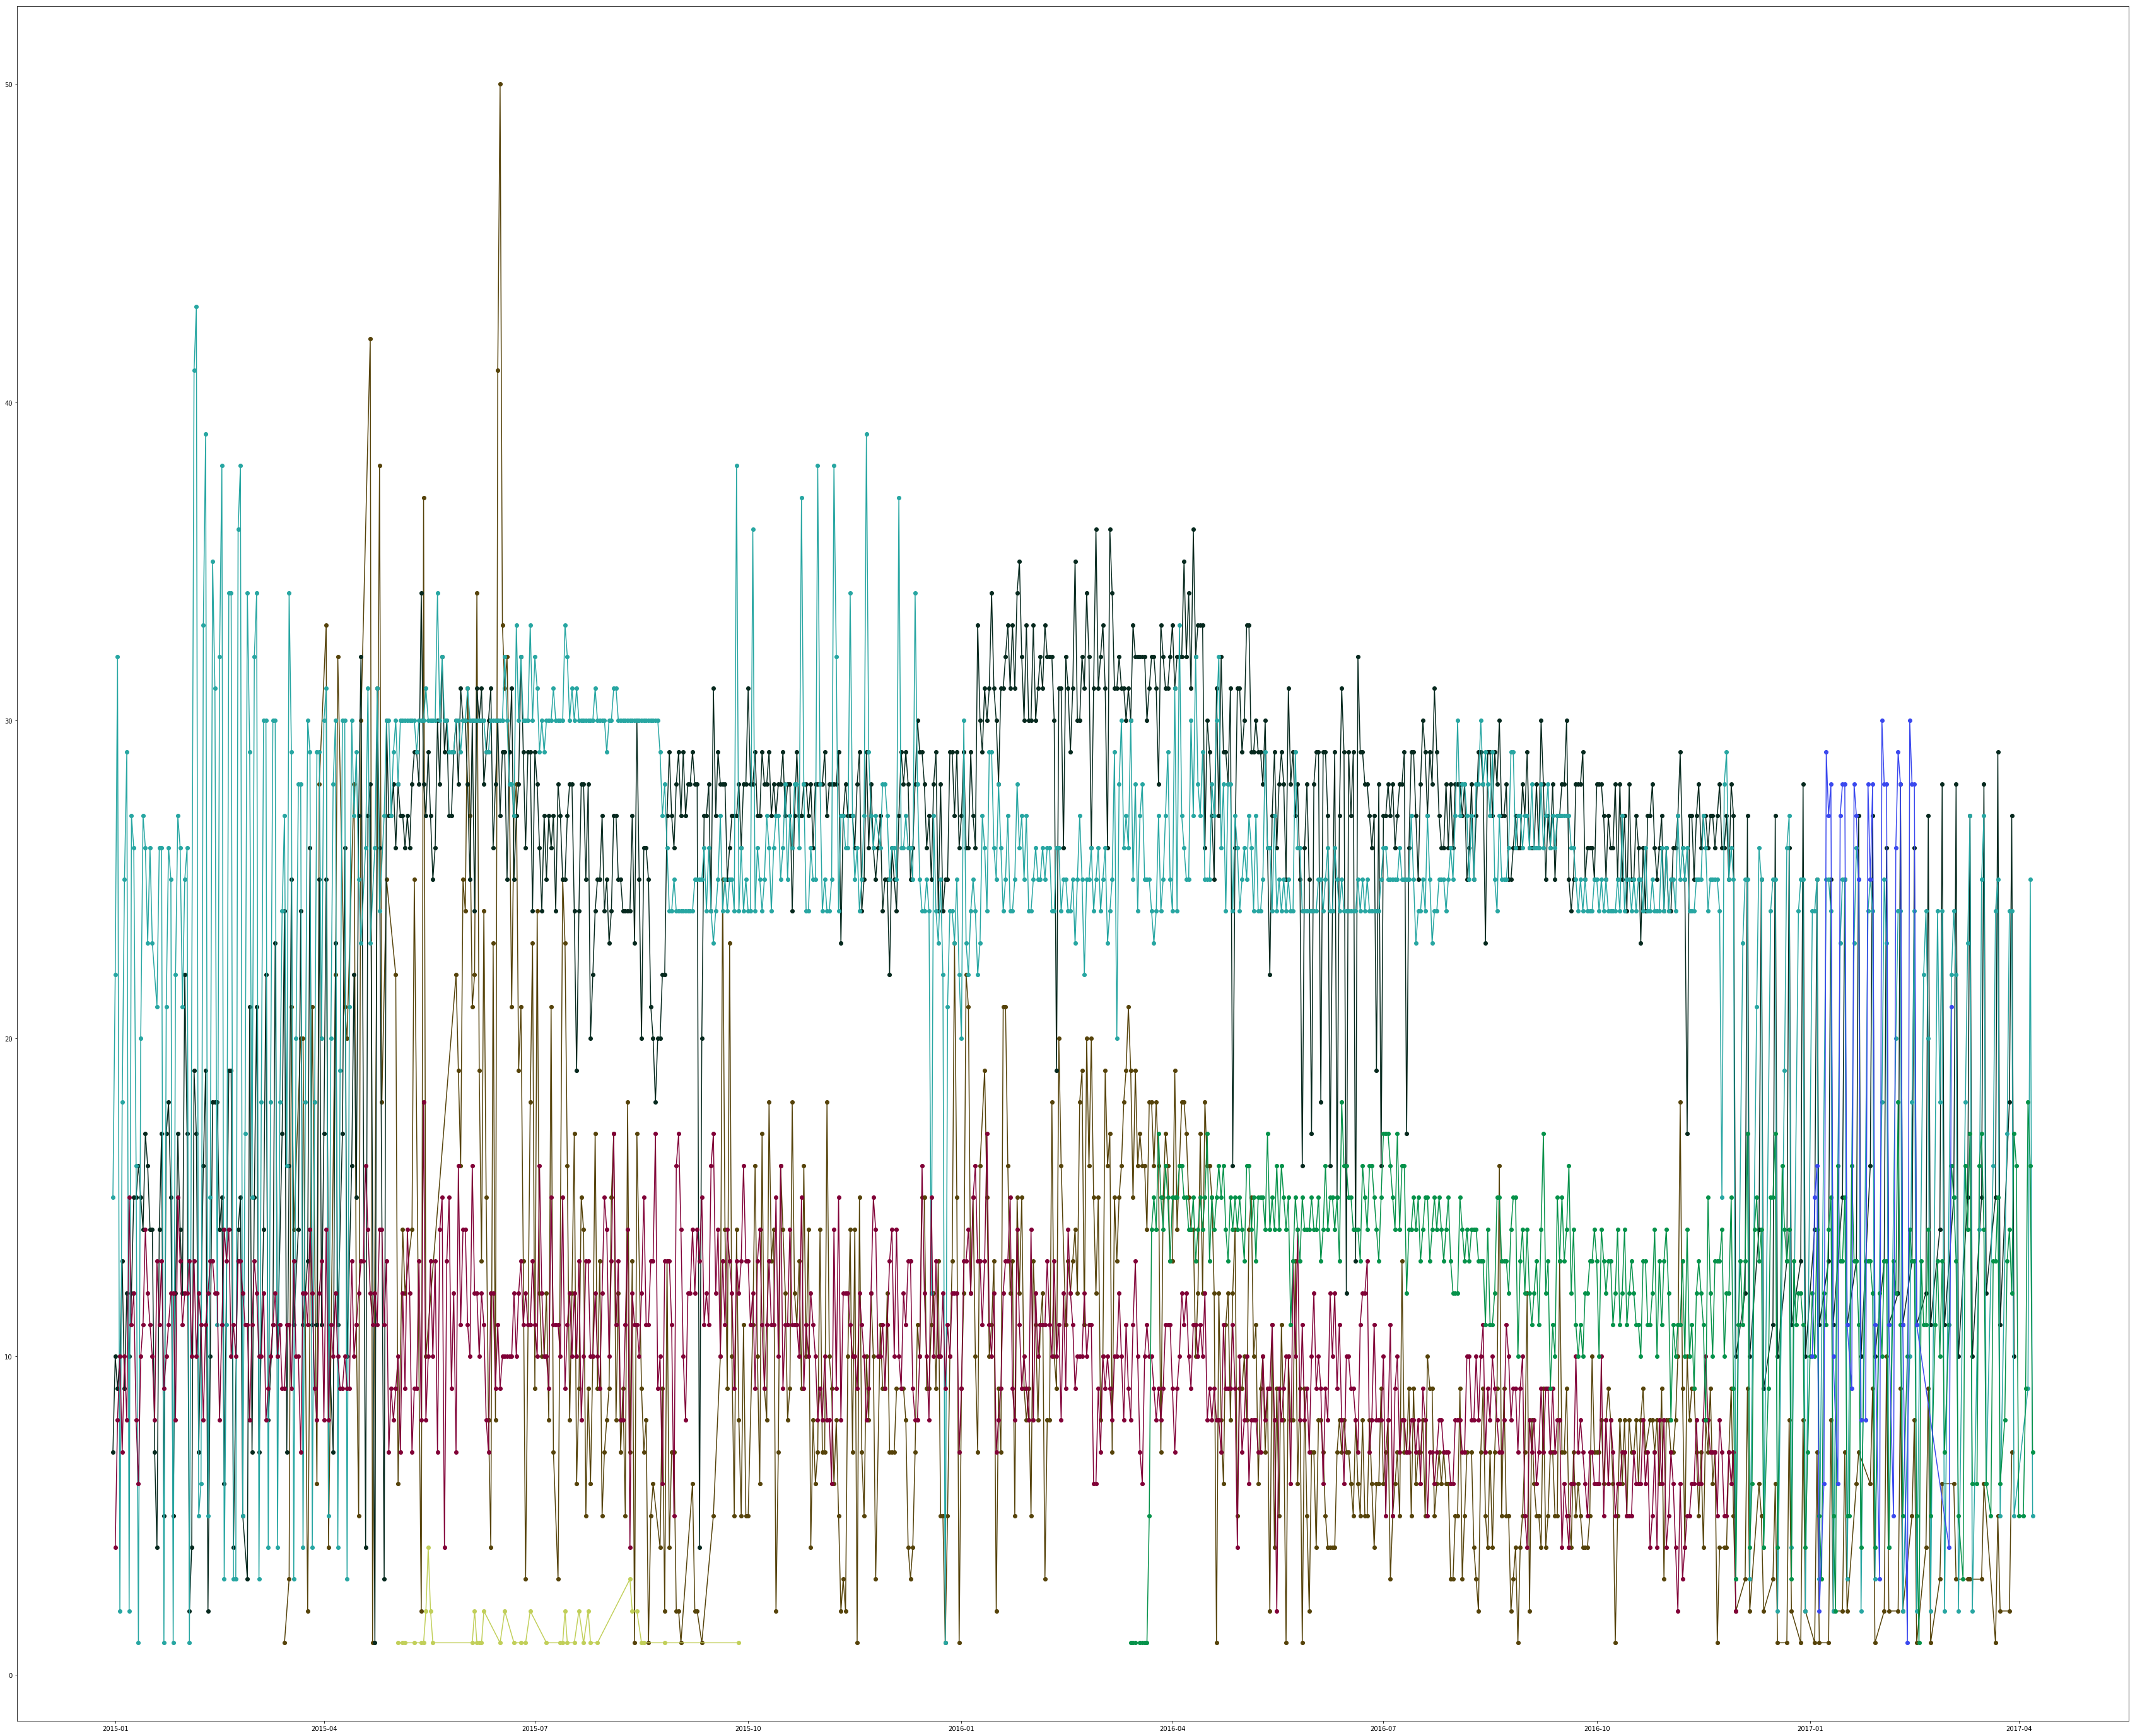

In [35]:
plt.rcParams['figure.figsize'] = [60, 50]
times = pd.DataFrame()
for i in similar_or_the_same_name:
    times = page_domain_same[page_domain_same['page_name']==i].groupby('post_created_date_CT').mean()
    times['count'] = page_domain_same[page_domain_same['page_name']==i].groupby('post_created_date_CT').size()
    times.reset_index(level=0, inplace=True)
    times=times[['post_created_date_CT','count']]
    times['post_created_date_CT'] = times['post_created_date_CT'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))
    mpl.pyplot.plot_date(times['post_created_date_CT'], times['count'], color = np.random.rand(3,),ls = 'solid')

### pages with different name as domain

In [36]:
page_domain_different = page_domain_same[(page_domain_same['domain']!='BB4SP.com')|(page_domain_same['domain']!='Disclose.tv')|
                                        (page_domain_same['domain']!='FreedomDaily.com')|(page_domain_same['domain']!='LiberalPlug.com')|
                                        (page_domain_same['domain']!='MadWorldNews.com')]
page_domain_different = page_domain_different[(page_domain_different['page_name']=='ClashDaily.com with Doug Giles')&
                                             (page_domain_different['domain']!='ClashDaily.com')]
page_domain_different

page_id                       page_name  \
82      228702593913193  ClashDaily.com with Doug Giles   
101     228702593913193  ClashDaily.com with Doug Giles   
126     228702593913193  ClashDaily.com with Doug Giles   
173     228702593913193  ClashDaily.com with Doug Giles   
209     228702593913193  ClashDaily.com with Doug Giles   
220     228702593913193  ClashDaily.com with Doug Giles   
222     228702593913193  ClashDaily.com with Doug Giles   
368     228702593913193  ClashDaily.com with Doug Giles   
418     228702593913193  ClashDaily.com with Doug Giles   
462     228702593913193  ClashDaily.com with Doug Giles   
467     228702593913193  ClashDaily.com with Doug Giles   
484     228702593913193  ClashDaily.com with Doug Giles   
493     228702593913193  ClashDaily.com with Doug Giles   
542     228702593913193  ClashDaily.com with Doug Giles   
546     228702593913193  ClashDaily.com with Doug Giles   
564     228702593913193  ClashDaily.com with Doug Giles   
614     228702593913193  ClashDaily.com with Doug Giles   
731     228702593913193  ClashDaily.com with Doug Giles   
770     228702593913193  ClashDaily.com with Doug Giles   
851     228702593913193  ClashDaily.com with Doug Giles   
852     228702593913193  ClashDaily.com with Doug Giles   
861     228702593913193  ClashDaily.com with Doug Giles   
936     228702593913193  ClashDaily.com with Doug Giles   
949     228702593913193  ClashDaily.com with Doug Giles   
1010    228702593913193  ClashDaily.com with Doug Giles   
1169    228702593913193  ClashDaily.com with Doug Giles   
1189    228702593913193  ClashDaily.com with Doug Giles   
1219    228702593913193  ClashDaily.com with Doug Giles   
1299    228702593913193  ClashDaily.com with Doug Giles   
1336    228702593913193  ClashDaily.com with Doug Giles   
...                 ...                             ...   
76382   228702593913193  ClashDaily.com with Doug Giles   
77232   228702593913193  ClashDaily.com with Doug Giles   
78007   228702593913193  ClashDaily.com with Doug Giles   
78093   228702593913193  ClashDaily.com with Doug Giles   
79085   228702593913193  ClashDaily.com with Doug Giles   
80610   228702593913193  ClashDaily.com with Doug Giles   
81892   228702593913193  ClashDaily.com with Doug Giles   
82333   228702593913193  ClashDaily.com with Doug Giles   
83006   228702593913193  ClashDaily.com with Doug Giles   
83581   228702593913193  ClashDaily.com with Doug Giles   
83901   228702593913193  ClashDaily.com with Doug Giles   
84436   228702593913193  ClashDaily.com with Doug Giles   
85221   228702593913193  ClashDaily.com with Doug Giles   
87051   228702593913193  ClashDaily.com with Doug Giles   
87473   228702593913193  ClashDaily.com with Doug Giles   
90160   228702593913193  ClashDaily.com with Doug Giles   
90174   228702593913193  ClashDaily.com with Doug Giles   
90436   228702593913193  ClashDaily.com with Doug Giles   
92272   228702593913193  ClashDaily.com with Doug Giles   
92666   228702593913193  ClashDaily.com with Doug Giles   
94670   228702593913193  ClashDaily.com with Doug Giles   
95614   228702593913193  ClashDaily.com with Doug Giles   
95962   228702593913193  ClashDaily.com with Doug Giles   
99957   228702593913193  ClashDaily.com with Doug Giles   
103304  228702593913193  ClashDaily.com with Doug Giles   
103781  228702593913193  ClashDaily.com with Doug Giles   
103788  228702593913193  ClashDaily.com with Doug Giles   
108574  228702593913193  ClashDaily.com with Doug Giles   
109164  228702593913193  ClashDaily.com with Doug Giles   
129671  228702593913193  ClashDaily.com with Doug Giles   

                                 post_id post_type  \
82      228702593913193_1007442819372496      link   
101     228702593913193_1049407408509370      link   
126     228702593913193_1003878156395629      link   
173     228702593913193_1021063921343719      link   
209     228702593913193_1139574249492685      link   
220      228702593913193_95348814

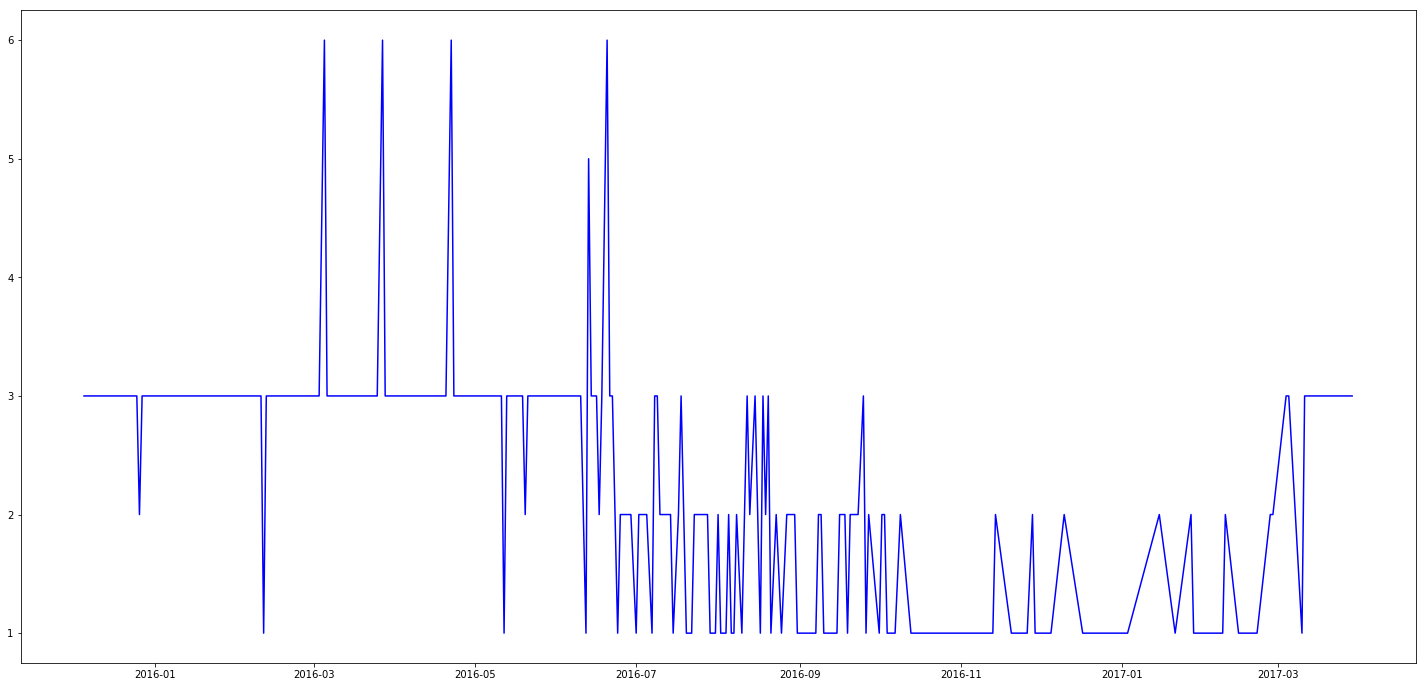

In [37]:
times = pd.DataFrame()
times = page_domain_different.groupby('post_created_date_CT').mean()
times['count'] = page_domain_different.groupby('post_created_date_CT').size()
times.reset_index(level=0, inplace=True)
times=times[['post_created_date_CT','count']]
times['post_created_date_CT'] = times['post_created_date_CT'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))
plt.rcParams['figure.figsize'] = [25, 12]
mpl.pyplot.plot_date(times['post_created_date_CT'], times['count'],'b-')

## pages that posts mainly from one domain

### Basic Analysis

In [38]:
page_domain_mainlyfromone = page_domain[(page_domain['page_name'] == '100 Percent FED Up') | (page_domain['page_name'] == 'Abolish The IRS') |(page_domain['page_name'] == 'America is RIGHT') |(page_domain['page_name'] == 'Last American Patriots') |(page_domain['page_name'] == 'My Favorite Gun') |(page_domain['page_name'] == 'Obama Makes Me Puke') |(page_domain['page_name'] == 'Patriot Nation')|
                                        (page_domain['page_name'] == 'Rebirth of Freedom') | (page_domain['page_name'] == 'Robertson Family Values') |(page_domain['page_name'] == 'Sean Brown') |(page_domain['page_name'] == 'Spokane Conservative Examiner') |(page_domain['page_name'] == 'Tell Me Now') |(page_domain['page_name'] == 'The Last Great Stand') |(page_domain['page_name'] == 'The New Resistance')|
                                        (page_domain['page_name'] == 'The Political Insider') | (page_domain['page_name'] == 'Girls Just Wanna Have Guns') |(page_domain['page_name'] == 'Angry American Patriots') |(page_domain['page_name'] == 'Ann Romney Fan Site') |
                         (page_domain['page_name'] == 'Dc Gazette') |(page_domain['page_name'] == 'Democrats Driving Forward to Victory') |(page_domain['page_name'] == 'End The Fed')|(page_domain['page_name'] == 'God King')|(page_domain['page_name'] == 'Trina')]

mainlyfromone_page = list(page_domain_mainlyfromone.page_name.unique())
mainlyfromwhat_domain = []
for i in mainlyfromone_page:
    test = page_domain_mainlyfromone[page_domain_mainlyfromone['page_name']==i]
    maximun = test.loc[test[0].idxmax()]
    mainlyfromwhat_domain.append(maximun['domain'])

In [39]:
first_post_create_time = pd.DataFrame()
for i in mainlyfromone_page:
    first_created = post_sort_by_created_time[post_sort_by_created_time['page_name']==i].head(1)
    first_post_create_time = pd.concat([first_post_create_time,first_created])
first_post_create_time = first_post_create_time[['page_name','post_created_date_CT']]
first_post_create_time.sort_values('post_created_date_CT')

page_name post_created_date_CT
23167                     The New Resistance           2014-12-31
96114                             Sean Brown           2014-12-31
22148                     Rebirth of Freedom           2014-12-31
52773                    Ann Romney Fan Site           2015-01-01
28401                         Patriot Nation           2015-01-10
37924             Girls Just Wanna Have Guns           2015-01-19
131426               Angry American Patriots           2015-01-22
112917                  The Last Great Stand           2015-01-27
32623                    Obama Makes Me Puke           2015-02-08
103306                Last American Patriots           2015-02-21
123107         Spokane Conservative Examiner           2015-03-21
21810                     100 Percent FED Up           2015-08-27
84882                             Dc Gazette           2015-12-22
18710                  The Political Insider           2016-01-13
120944                       My Favorite Gun           2016-01-20
119278                       Abolish The IRS           2016-01-20
274                                 God King           2016-02-08
79886                Robertson Family Values           2016-02-22
14394                                  Trina           2016-02-27
118782                      America is RIGHT           2016-03-25
28897                            Tell Me Now           2016-04-26
17613   Democrats Driving Forward to Victory           2016-10-01
4105                             End The Fed           2017-01-03

### Plots

In [40]:
mainlyfromone = politifact_with_fake_domain[(politifact_with_fake_domain['page_name'] == '100 Percent FED Up') | (politifact_with_fake_domain['page_name'] == 'Abolish The IRS') |(politifact_with_fake_domain['page_name'] == 'America is RIGHT') |(politifact_with_fake_domain['page_name'] == 'Last American Patriots') |(politifact_with_fake_domain['page_name'] == 'My Favorite Gun') |(politifact_with_fake_domain['page_name'] == 'Obama Makes Me Puke') |(politifact_with_fake_domain['page_name'] == 'Patriot Nation')|
                                        (politifact_with_fake_domain['page_name'] == 'Rebirth of Freedom') | (politifact_with_fake_domain['page_name'] == 'Robertson Family Values') |(politifact_with_fake_domain['page_name'] == 'Sean Brown') |(politifact_with_fake_domain['page_name'] == 'Spokane Conservative Examiner') |(politifact_with_fake_domain['page_name'] == 'Tell Me Now') |(politifact_with_fake_domain['page_name'] == 'The Last Great Stand') |(politifact_with_fake_domain['page_name'] == 'The New Resistance')|
                                        (politifact_with_fake_domain['page_name'] == 'The Political Insider') | (politifact_with_fake_domain['page_name'] == 'Girls Just Wanna Have Guns') |(politifact_with_fake_domain['page_name'] == 'Angry American Patriots') |(politifact_with_fake_domain['page_name'] == 'Ann Romney Fan Site') |
                         (politifact_with_fake_domain['page_name'] == 'Dc Gazette') |(politifact_with_fake_domain['page_name'] == 'Democrats Driving Forward to Victory') |(politifact_with_fake_domain['page_name'] == 'End The Fed')|(page_domain['page_name'] == 'God King')|(politifact_with_fake_domain['page_name'] == 'Trina')]
mainlyfromone

page_id                      page_name  \
12      591402597574018                    Tell Me Now   
30      112723252096438          The Political Insider   
38      112723252096438          The Political Insider   
50      112723252096438          The Political Insider   
53      112723252096438          The Political Insider   
65      721683147909323             The New Resistance   
74      721683147909323             The New Resistance   
78      591402597574018                    Tell Me Now   
95      112723252096438          The Political Insider   
98      591402597574018                    Tell Me Now   
112     591402597574018                    Tell Me Now   
156     112723252096438          The Political Insider   
157     591402597574018                    Tell Me Now   
184     591402597574018                    Tell Me Now   
195     112723252096438          The Political Insider   
203     721683147909323             The New Resistance   
231     112723252096438          The Political Insider   
237     721683147909323             The New Resistance   
242     591402597574018                    Tell Me Now   
279     721683147909323             The New Resistance   
281     591402597574018                    Tell Me Now   
283     721683147909323             The New Resistance   
288     591402597574018                    Tell Me Now   
292     311190048935167             100 Percent FED Up   
297     591402597574018                    Tell Me Now   
298     591402597574018                    Tell Me Now   
316     591402597574018                    Tell Me Now   
317     311190048935167             100 Percent FED Up   
329     112723252096438          The Political Insider   
332     721683147909323             The New Resistance   
...                 ...                            ...   
132294  146612062031906  Spokane Conservative Examiner   
132295  312531385450925           The Last Great Stand   
132296  312531385450925           The Last Great Stand   
132297  312531385450925           The Last Great Stand   
132298  312531385450925           The Last Great Stand   
132299  312531385450925           The Last Great Stand   
132300  312531385450925           The Last Great Stand   
132301  312531385450925           The Last Great Stand   
132302  312531385450925           The Last Great Stand   
132303  312531385450925           The Last Great Stand   
132304  146612062031906  Spokane Conservative Examiner   
132305  146612062031906  Spokane Conservative Examiner   
132307  312531385450925           The Last Great Stand   
132308  146612062031906  Spokane Conservative Examiner   
132309  312531385450925           The Last Great Stand   
132310  312531385450925           The Last Great Stand   
132311  312531385450925           The Last Great Stand   
132312  149817218374125     Girls Just Wanna Have Guns   
132313  312531385450925           The Last Great Stand   
132314  312531385450925           The Last Great Stand   
132315  425390150874429                     Sean Brown   
132316  312531385450925           The Last Great Stand   
132317  751413538254047               America is RIGHT   
132318  312531385450925           The Last Great Stand   
132319  146612062031906  Spokane Conservative Examiner   
132320  312531385450925           The Last Great Stand   
132321  425390150874429                     Sean Brown   
132322  146612062031906  Spokane Conservative Examiner   
132323  312531385450925           The Last Great Stand   
132324  312531385450925           The Last Great Stand   

                                 post_id post_type  \
12      591402597574018_1065863346794605      link   
30      112723252096438_1061186837250070      link   
38      112723252096438_1146533155382104      link   
50      112723252096438_1253098804725538      link   
53      112723252096438_1155268367841916      link   
65      721683147909323_1276732035737762      link   
74      721683147909323_1286162778128021 

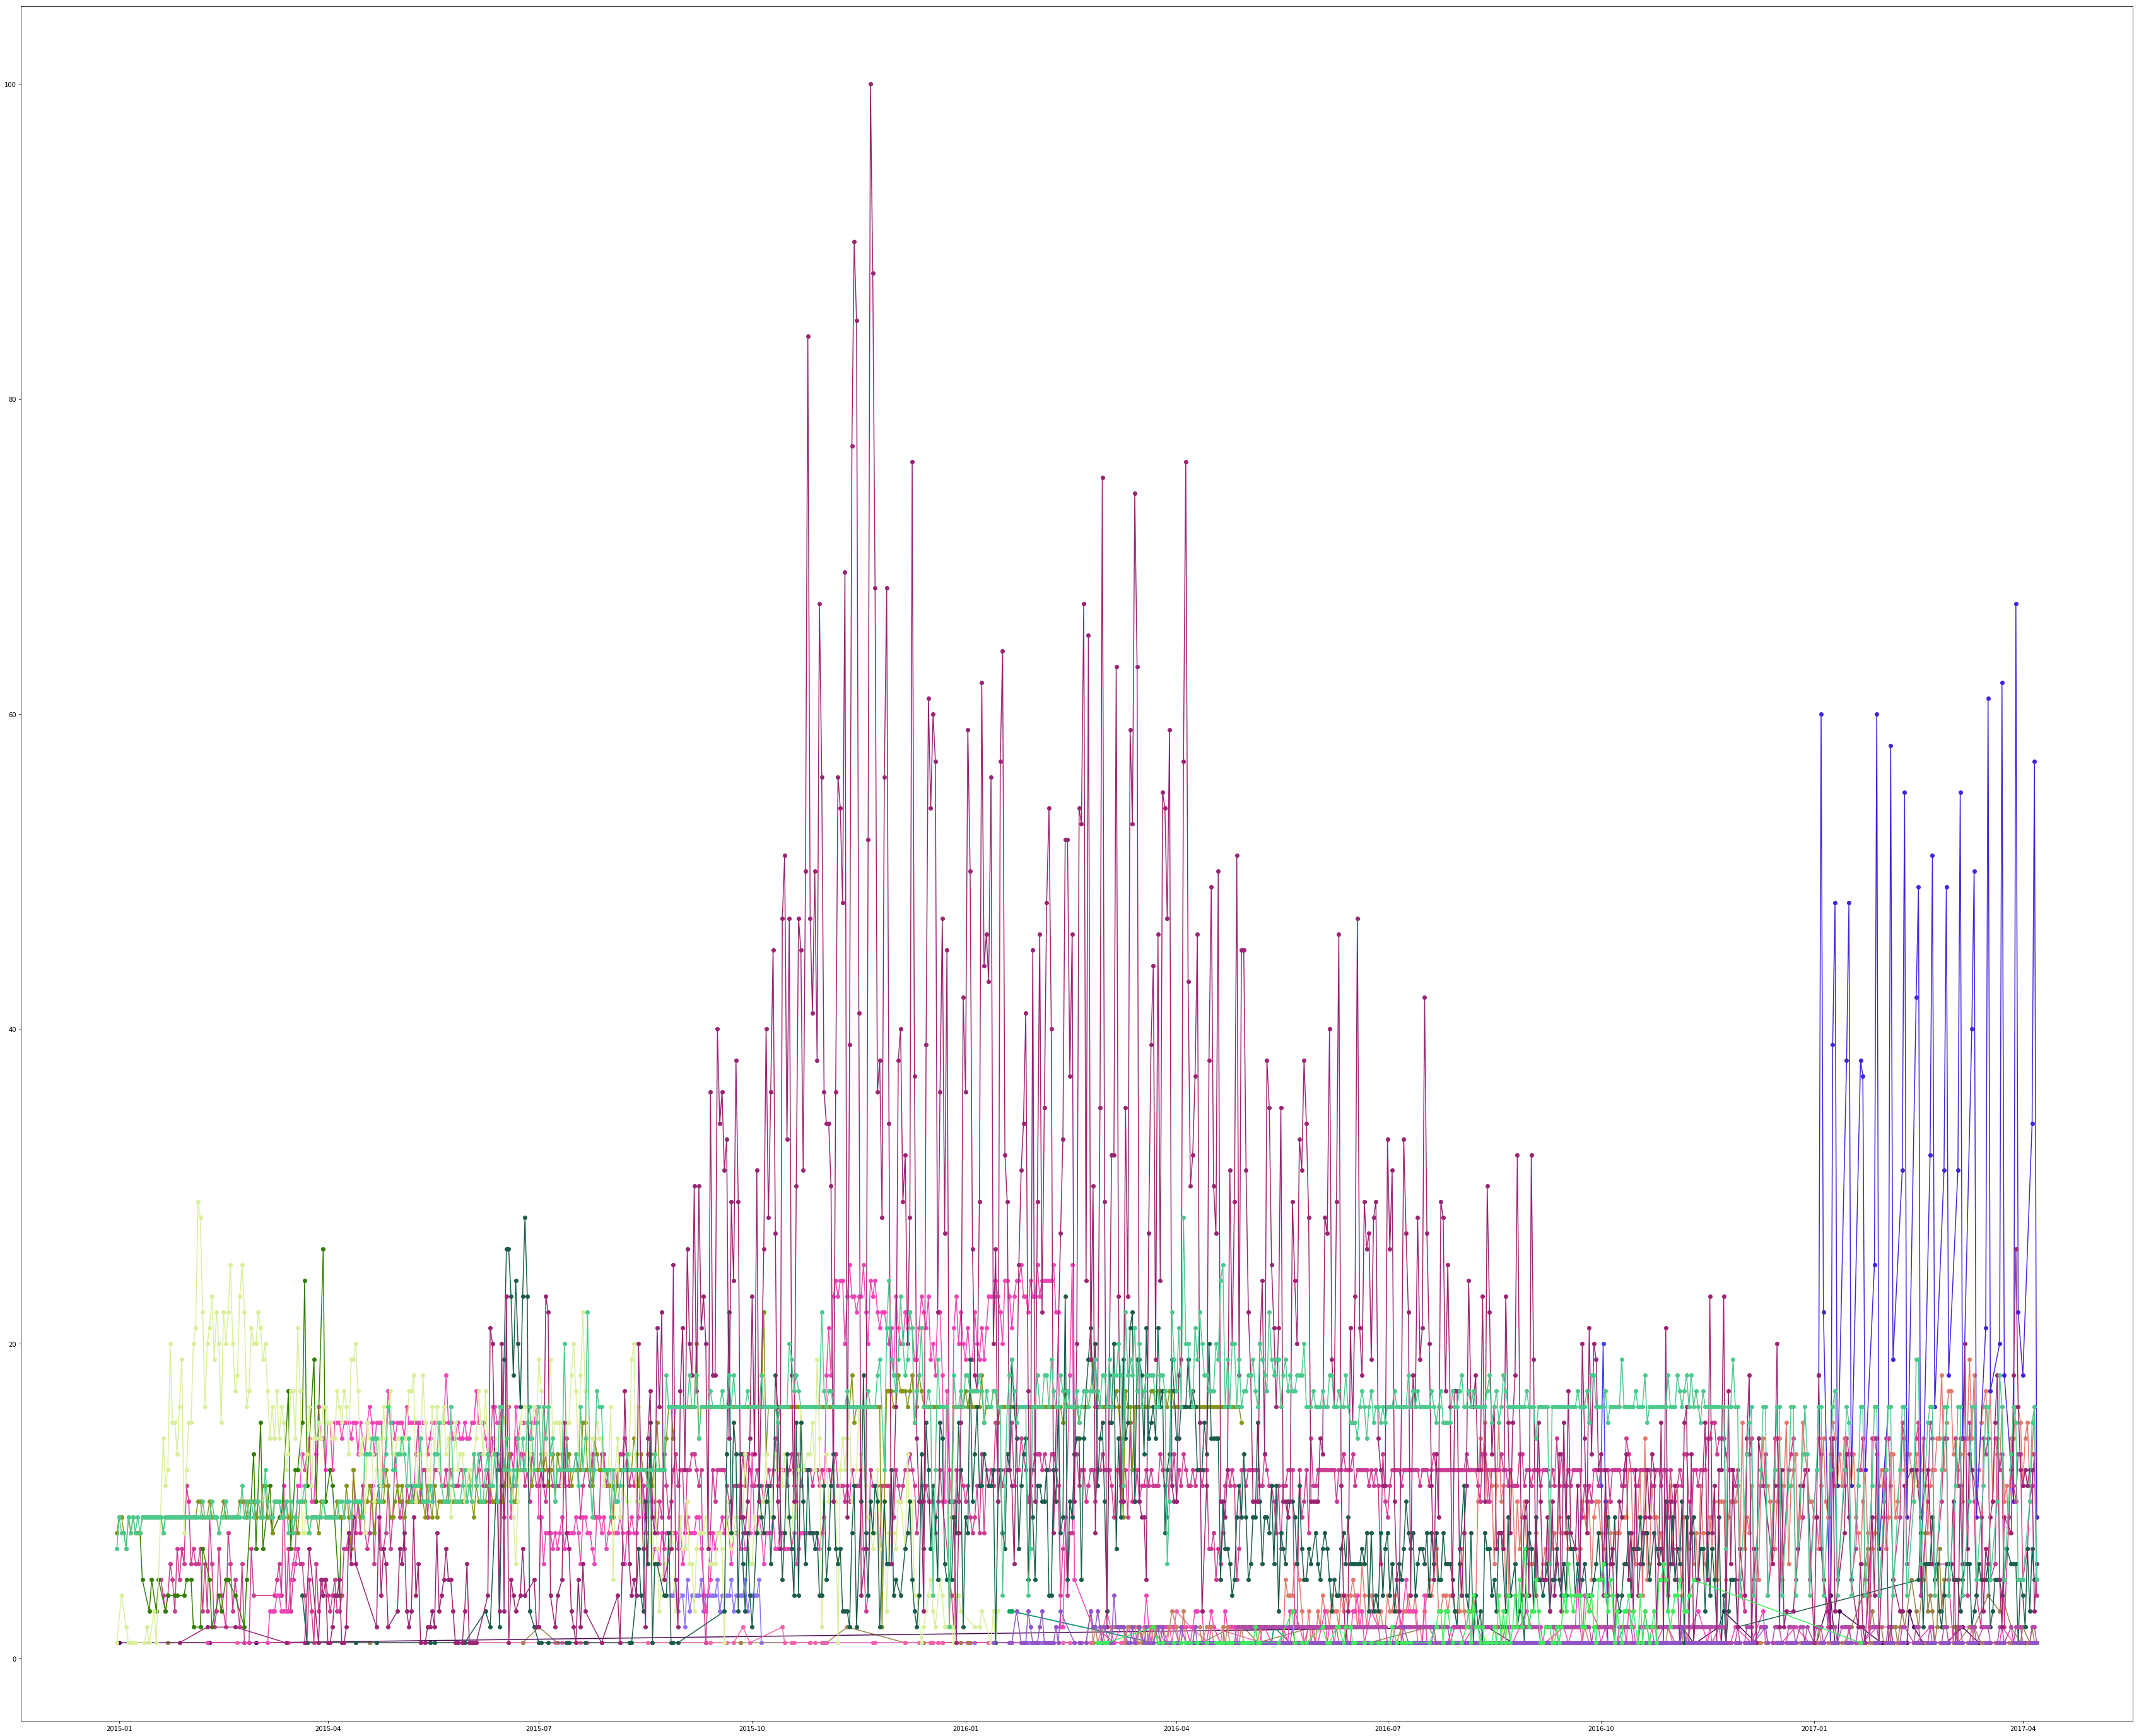

In [41]:
plt.rcParams['figure.figsize'] = [60, 50]
times = pd.DataFrame()
for i in mainlyfromone_page:
    times = mainlyfromone[mainlyfromone['page_name']==i].groupby('post_created_date_CT').mean()
    times['count'] = mainlyfromone[mainlyfromone['page_name']==i].groupby('post_created_date_CT').size()
    times.reset_index(level=0, inplace=True)
    times=times[['post_created_date_CT','count']]
    times['post_created_date_CT'] = times['post_created_date_CT'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))
    mpl.pyplot.plot_date(times['post_created_date_CT'], times['count'], color = np.random.rand(3,),ls = 'solid')

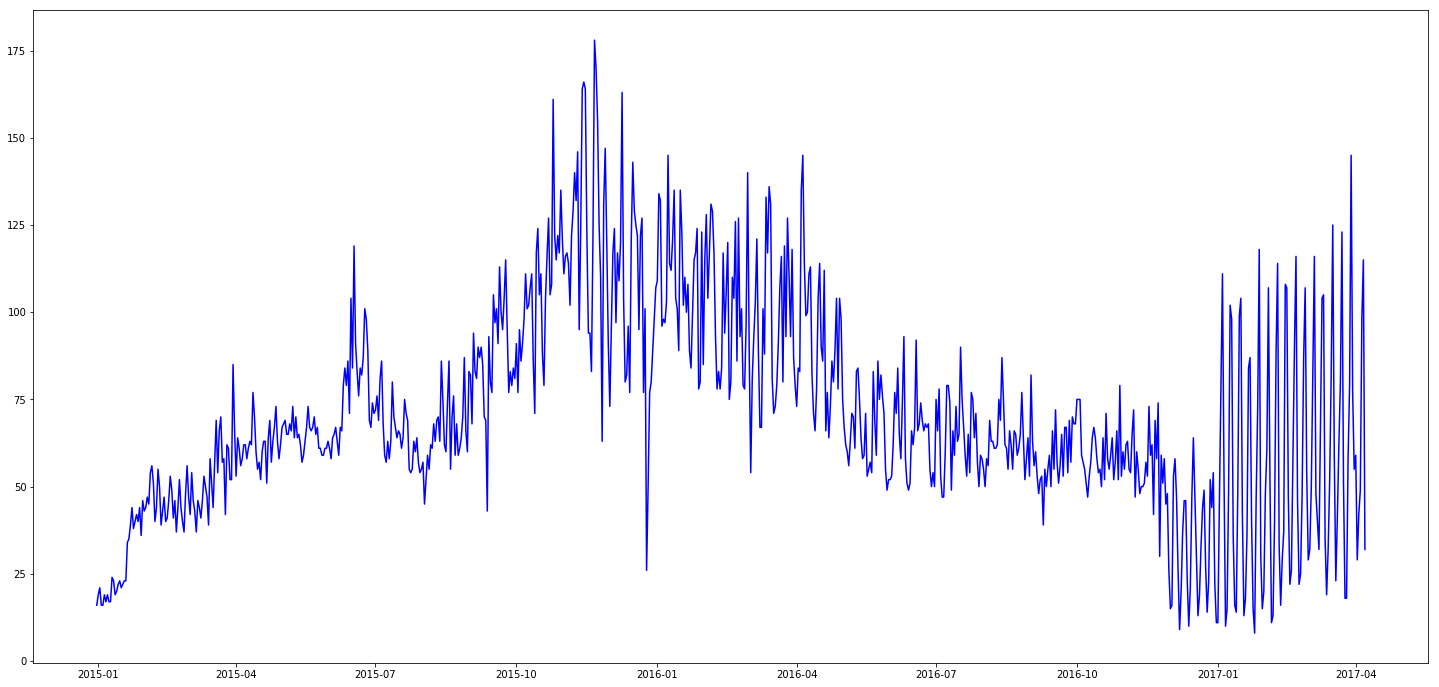

In [42]:
times = pd.DataFrame()
times = mainlyfromone.groupby('post_created_date_CT').mean()
times['count'] = mainlyfromone.groupby('post_created_date_CT').size()
times.reset_index(level=0, inplace=True)
times=times[['post_created_date_CT','count']]
times['post_created_date_CT'] = times['post_created_date_CT'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))
plt.rcParams['figure.figsize'] = [25, 12]
mpl.pyplot.plot_date(times['post_created_date_CT'], times['count'],'b-')

In [43]:
mainlyfromone_page
mainlyfromwhat_domain
mainlyfromone_data = pd.DataFrame()
for i in range(23):
    test = mainlyfromone[(mainlyfromone['page_name']==mainlyfromone_page[i])&(mainlyfromone['domain']!=mainlyfromwhat_domain[i])]
    mainlyfromone_data = pd.concat([mainlyfromone_data,test])
mainlyfromone_data

page_id             page_name  \
292     311190048935167    100 Percent FED Up   
317     311190048935167    100 Percent FED Up   
819     311190048935167    100 Percent FED Up   
1612    311190048935167    100 Percent FED Up   
2035    311190048935167    100 Percent FED Up   
2360    311190048935167    100 Percent FED Up   
3727    311190048935167    100 Percent FED Up   
5467    311190048935167    100 Percent FED Up   
6950    311190048935167    100 Percent FED Up   
7248    311190048935167    100 Percent FED Up   
10063   311190048935167    100 Percent FED Up   
10308   311190048935167    100 Percent FED Up   
10915   311190048935167    100 Percent FED Up   
11797   311190048935167    100 Percent FED Up   
11961   311190048935167    100 Percent FED Up   
13945   311190048935167    100 Percent FED Up   
16751   311190048935167    100 Percent FED Up   
17591   311190048935167    100 Percent FED Up   
18494   311190048935167    100 Percent FED Up   
21252   311190048935167    100 Percent FED Up   
21944   311190048935167    100 Percent FED Up   
22777   311190048935167    100 Percent FED Up   
23796   311190048935167    100 Percent FED Up   
25633   311190048935167    100 Percent FED Up   
26920   311190048935167    100 Percent FED Up   
40930   311190048935167    100 Percent FED Up   
43891   311190048935167    100 Percent FED Up   
119278  316913578439861       Abolish The IRS   
126115  316913578439861       Abolish The IRS   
128469  316913578439861       Abolish The IRS   
...                 ...                   ...   
116995  312531385450925  The Last Great Stand   
117644  312531385450925  The Last Great Stand   
119691  312531385450925  The Last Great Stand   
120372  312531385450925  The Last Great Stand   
121244  312531385450925  The Last Great Stand   
121399  312531385450925  The Last Great Stand   
129172  312531385450925  The Last Great Stand   
130763  312531385450925  The Last Great Stand   
132222  312531385450925  The Last Great Stand   
3723    721683147909323    The New Resistance   
4643    721683147909323    The New Resistance   
12465   721683147909323    The New Resistance   
21443   721683147909323    The New Resistance   
22115   721683147909323    The New Resistance   
32549   721683147909323    The New Resistance   
37305   721683147909323    The New Resistance   
51429   721683147909323    The New Resistance   
2389        21124264380                 Trina   
6532        21124264380                 Trina   
9649        21124264380                 Trina   
10779       21124264380                 Trina   
11506       21124264380                 Trina   
12487       21124264380                 Trina   
21609       21124264380                 Trina   
24214       21124264380                 Trina   
27168       21124264380                 Trina   
28726       21124264380                 Trina   
38958       21124264380                 Trina   
46856       21124264380                 Trina   
57141       21124264380                 Trina   

                                 post_id post_type  \
292     311190048935167_1184685238252306      link   
317     311190048935167_1181048015282695      link   
819     311190048935167_1179785018742328      link   
1612    311190048935167_1170058743048289      link   
2035    311190048935167_1187623397958490      link   
2360    311190048935167_1182414141812749      link   
3727    311190048935167_1171391696248327      link   
5467    311190048935167_1190126087708221      link   
6950    311190048935167_1175298435857653      link   
7248    311190048935167_1173749806012516      link   
10063   311190048935167_1173769912677172      link   
10308   311190048935167_1177676522286511      link   
10915   311190048935167_1176495625737934      link   
11797   311190048935167_1319368341450661      link   
11961   311190048935167_1178774372176726      link   
13945   311190048935167_1188684651185698      link   
16751   311190048935167_1191493347571495      link   
17591

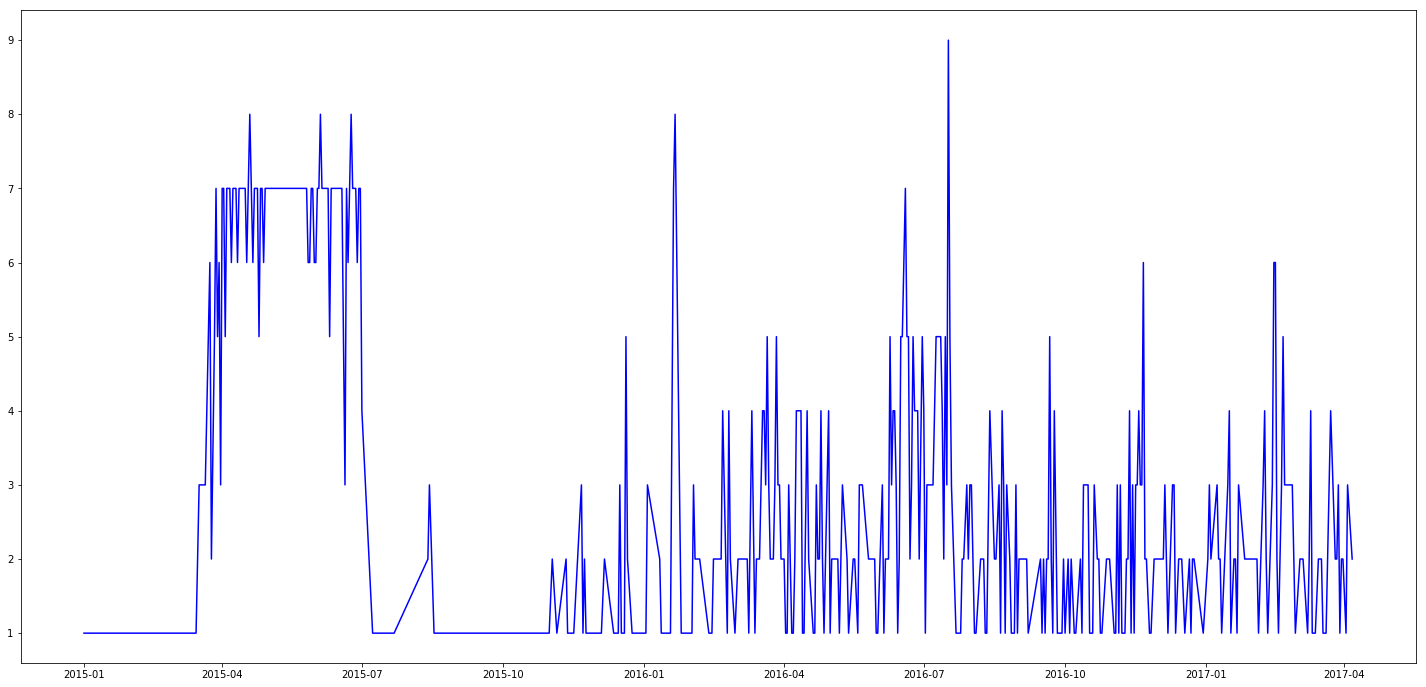

In [44]:
times = pd.DataFrame()
times = mainlyfromone_data.groupby('post_created_date_CT').mean()
times['count'] = mainlyfromone_data.groupby('post_created_date_CT').size()
times.reset_index(level=0, inplace=True)
times=times[['post_created_date_CT','count']]
times['post_created_date_CT'] = times['post_created_date_CT'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))
plt.rcParams['figure.figsize'] = [25, 12]
mpl.pyplot.plot_date(times['post_created_date_CT'], times['count'],'b-')